In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [1]:
#import yfinance module for extracting data from yahoo finance
import yfinance as yf

#sp500_ticker = "^GSPC"
#hsi_ticker = "^HSI"

ndx_ticker = "^NDX"

# Fetch historical data for the S&P 500
hist_data = yf.download(ndx_ticker, start="1994-01-01", end="2024-01-01")

# Save the data to a CSV file
#sp500_data.to_csv("sp500_data.csv")
hist_data.to_csv("ndx_data.csv")

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Sample Plot')

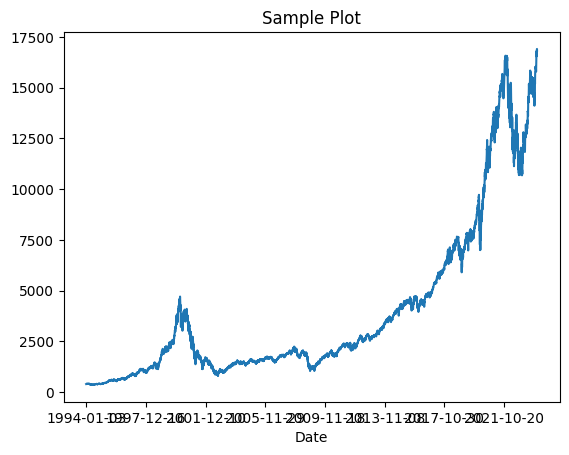

In [11]:
#Load the data S&P500
data = pd.read_csv('ndx_data.csv',index_col=0)
##print(data)
#columns_to_clean= ['Open' , 'High', 'Low', 'Close']
#data[columns_to_clean] = data[columns_to_clean].apply(lambda x: x.str.replace(',', ''))
#data[columns_to_clean] = data[columns_to_clean].astype(float)

#Reversing the data to have older->newer data based on date
#df_reversed = data.iloc[::-1]

data['Close'].plot().set_title('Sample Plot')

In [5]:
# 99% data as training data and 1% as test data
# With 95% training data and 5% test dta getting 96% accuracy
train_data = data.iloc[:int(.95 * len(data)),:]
test_data = data.iloc[int(.95 * len(data)):,:]

print(test_data)

                    Open          High           Low         Close  \
Date                                                                 
2022-06-30  11532.320312  11650.959961  11322.860352  11503.719727   
2022-07-01  11472.629883  11592.849609  11378.629883  11585.679688   
2022-07-05  11419.339844  11781.740234  11366.070312  11779.900391   
2022-07-06  11807.080078  11941.309570  11727.360352  11852.589844   
2022-07-07  11913.730469  12137.709961  11897.509766  12109.049805   
...                  ...           ...           ...           ...   
2023-12-22  16799.019531  16839.250000  16703.570312  16777.400391   
2023-12-26  16816.779297  16907.509766  16813.570312  16878.460938   
2023-12-27  16896.140625  16922.009766  16859.550781  16906.800781   
2023-12-28  16963.519531  16969.169922  16891.320312  16898.470703   
2023-12-29  16902.439453  16919.509766  16757.890625  16825.929688   

               Adj Close      Volume  
Date                                  
2022-06-30 

In [6]:
features =['Open','Volume'] # independnt
target = ['Close'] #dependent

In [7]:
model = xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
#Make and show the prediction on test data
predictions = model.predict(test_data[features])
#print('Model Predictions:')
#print("Predictions:", predictions)
#print("Actual:", test_data[target])

In [9]:
accuracy = model.score(test_data[features],test_data[target])
print(accuracy)

0.978182384645267


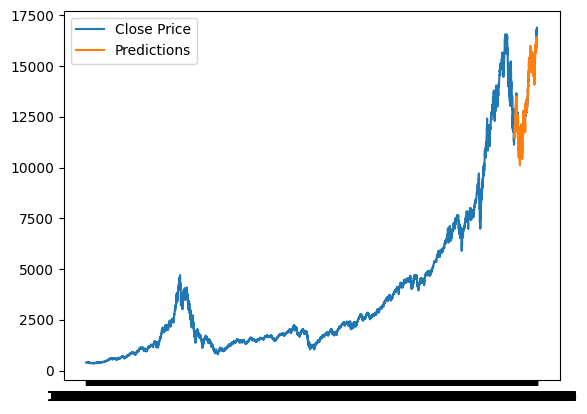

In [10]:
# Plot predictions over actual 'Closing' to see difference. 
plt.plot(data['Close'] ,label='Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test_data[target],predictions)
print(mse)

variance = np.var(test_data[target])
print(variance)

r_squared = 1 - mse / variance
print("R-squared:", r_squared)


654.6455076818842
Close    644.819144
dtype: float64
R-squared: Close   -0.015239
dtype: float64
